In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics  #to include metrics for evaluation # this used to be cross_validation
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

In [2]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
df_telco = pd.read_csv('../../model_testing/UnBalancedData/Churn Prediction/Telco-Customer-Churn.csv', usecols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'])
df_telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data = df_telco.copy()
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data[data['TotalCharges'].isna()==True] = 0

data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


## Freature Reduction

### With RFE

In [5]:
X = data.drop('Churn', axis=1)
y = data.Churn

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_new = scaler.fit_transform(X)

In [7]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import RFE

rfr = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rfr, step=1)

In [8]:
rfe = rfe.fit(X_new, y)

In [9]:
X_rfe = X.loc[:, rfe.support_]
X_new2 = scaler.fit_transform(X_rfe)

# Build a classification model using various methods

In [11]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',max_iter=-1),
        'params' : {
            'C': [1,10,20],
#             'kernel': ['linear', 'rbf',],
            #'shrinking':['True', 'False']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['newton-cg', 'liblinear']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'kneighbours': {
        'model': KNeighborsClassifier(n_jobs=-1),
        "params": {
            
            'n_neighbors' : [5, 10 , 100],
        }
    },
    'Xgboost': {
        'model': XGBClassifier(n_jobs=-1),
        "params": {
            'n_estimators': [100, 115, 150],
            'max_depth': [3,4,5,6, 10],
#                    'max_features': [None, 'auto', 'sqrt', 'log2'], 
#                    'min_samples_split': [2, 3, 4, 5, 10]
           
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(n_jobs=-1),
        "params": {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'num_leaves': [100,200,300,500,1000]
        }
    },

}

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)
scores = []

for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X_new2, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_.round(4),
        'best_params': clf.best_params_
    })

In [13]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values('best_score', ascending=False)

,model,best_score,best_params
0,svm,0.7994,{'C': 20}
1,random_forest,0.7991,"{'max_depth': 5, 'min_samples_leaf': 100, 'n_e..."
6,LightGBM,0.7985,"{'max_depth': 4, 'n_estimators': 100, 'num_lea..."
2,logistic_regression,0.7984,"{'C': 10, 'solver': 'newton-cg'}"
5,Xgboost,0.7934,"{'max_depth': 3, 'n_estimators': 100}"
4,kneighbours,0.7924,{'n_neighbors': 100}
3,naive_bayes_gaussian,0.7481,{}


# Creating Pipeline

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [78]:
df_telco = pd.read_csv('../../model_testing/UnBalancedData/Churn Prediction/Telco-Customer-Churn.csv', 
                       usecols=['gender', 'Partner', 'tenure', 'InternetService', 'Contract', 'PaperlessBilling',
                                'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'])

df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors = 'coerce')
df_telco['TotalCharges'].fillna(0, inplace=True)
df_telco['Churn'].replace(['Yes','No'],[1,0],inplace=True)

df_telco.head()

,gender,Partner,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,1,DSL,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,34,DSL,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,2,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,45,DSL,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,2,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [79]:
X = df_telco.drop('Churn', axis=1)
y = df_telco[['Churn']]


numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [80]:
for i in categorical_columns:
    print(i, X[i].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [81]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = MinMaxScaler()

In [82]:
preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)

In [83]:
model = make_pipeline(preprocessor, XGBClassifier())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'InternetService',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('standard_scaler',
                                                  MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=N...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [91]:
data_train, data_test, target_train, target_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [92]:
_ = model.fit(data_train, target_train)

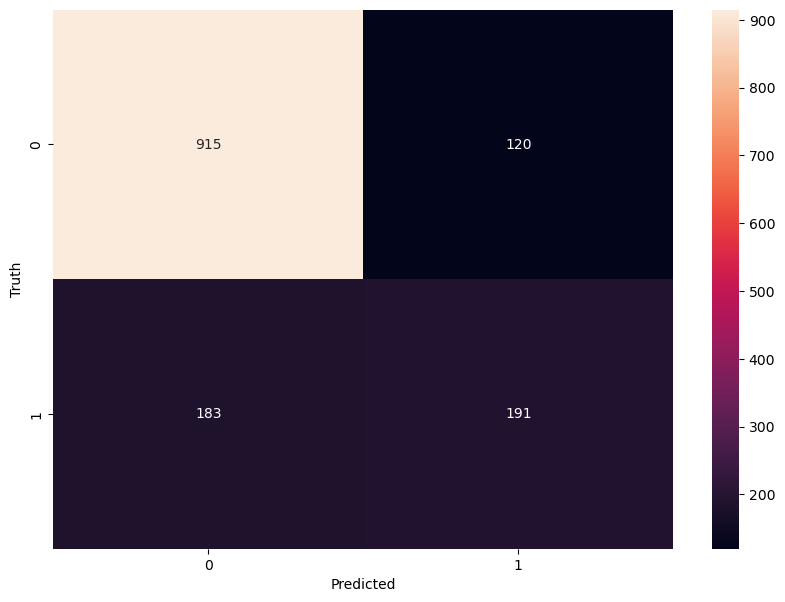

In [96]:
from sklearn.metrics import confusion_matrix , classification_report

y_predicted = model.predict(data_test)
cm = confusion_matrix(y_true=target_test, y_pred=y_predicted)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [97]:
print("Classification Report: \n", classification_report(target_test, y_predicted))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [98]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)